# Texto Bruto (Com Header e Com Entrevistador)

In [44]:
# Carregar X_train e y_train
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-P

In [45]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

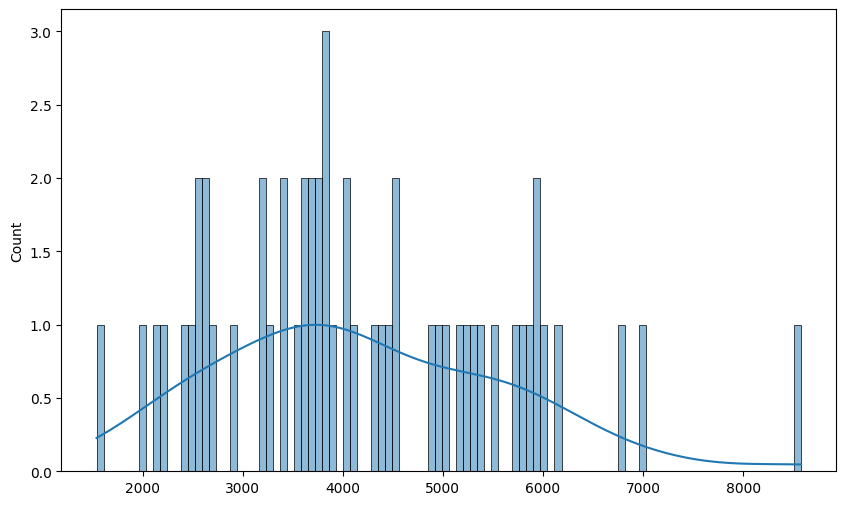

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_neg_len = [len(x) for x in x_neg]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_neg_len, bins=100, kde=True)

# Mostre o gráfico
plt.show()

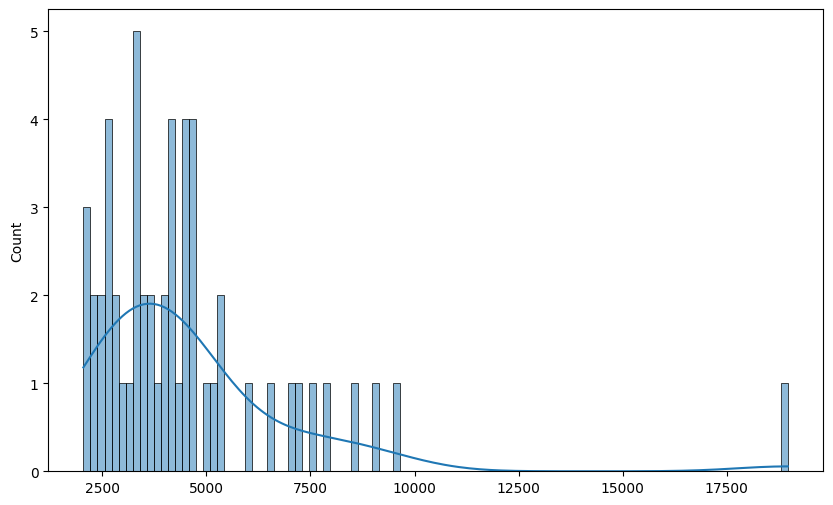

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_pos_len = [len(x) for x in x_pos]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_pos_len, bins=100, kde=True)

# Defina os limites do eixo x
#plt.xlim(0, 10000)

# Mostre o gráfico
plt.show()

In [28]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7708333333333334


    k  Test Set Accuracy
0   1           0.687500
1   3           0.750000
2   5           0.791667
3   7           0.770833
4   9           0.770833
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.750000
9  19           0.687500
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


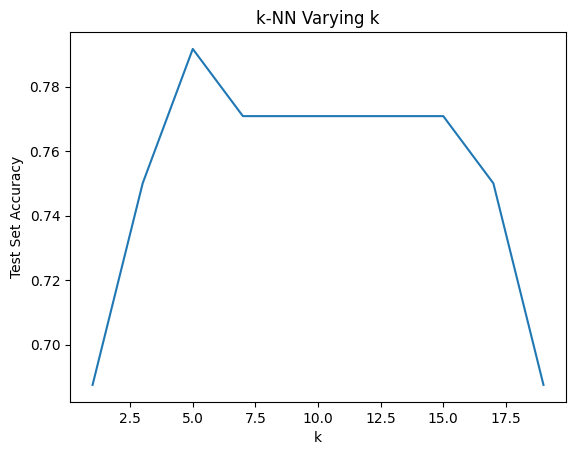

In [29]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Com Header e Sem Entrevistador

In [30]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|J

In [31]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [32]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.75


    k  Test Set Accuracy
0   1           0.625000
1   3           0.750000
2   5           0.791667
3   7           0.750000
4   9           0.729167
5  11           0.750000
6  13           0.750000
7  15           0.770833
8  17           0.708333
9  19           0.770833
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


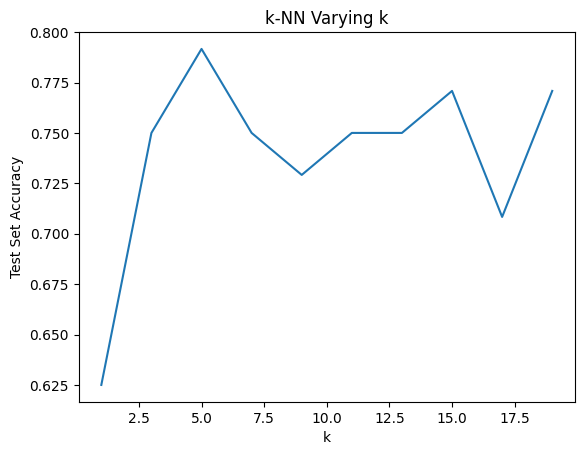

In [33]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Com Entrevistador

In [34]:
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                
                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])
                
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD

In [35]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [36]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7291666666666666


    k  Test Set Accuracy
0   1           0.708333
1   3           0.687500
2   5           0.687500
3   7           0.729167
4   9           0.708333
5  11           0.708333
6  13           0.687500
7  15           0.666667
8  17           0.687500
9  19           0.666667
Best k value: 7
Accuracy on test set with best k: 0.7291666666666666


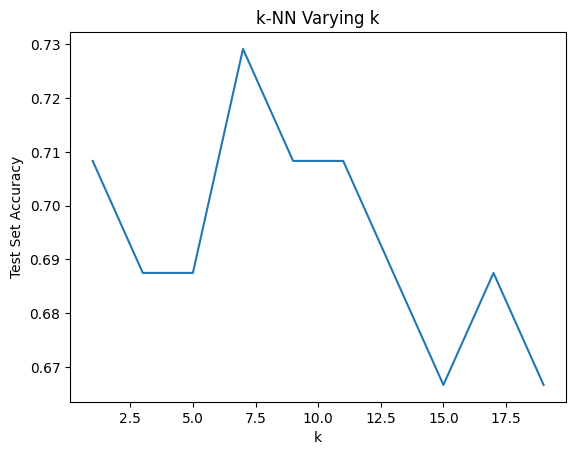

In [37]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Sem Entrevistador

In [38]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD
	16|3|PUNCT
*PAR:	an(d) &uh the window's open . 13310_20608
%mor:	coord|and det:art|the adj|window&dn-POSS adj|open .
%gra:	1

In [39]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [40]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7083333333333334


    k  Test Set Accuracy
0   1           0.708333
1   3           0.708333
2   5           0.687500
3   7           0.708333
4   9           0.750000
5  11           0.708333
6  13           0.666667
7  15           0.687500
8  17           0.666667
9  19           0.687500
Best k value: 9
Accuracy on test set with best k: 0.75


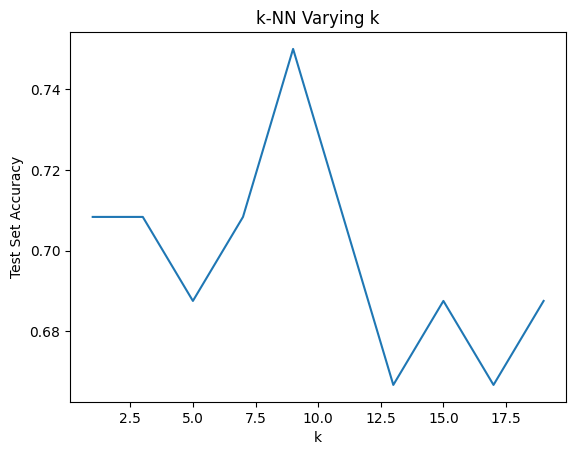

In [41]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

In [43]:
print(len(train_ncd[0]))
train_ncd[0]

108


[0.033590558329550615,
 0.8075351793009532,
 0.7834770767135724,
 0.7896551724137931,
 0.7823159784560144,
 0.7684975034044484,
 0.8356786200635498,
 0.8238765320018157,
 0.8134362233318202,
 0.8216068996822514,
 0.8452110758057195,
 0.7771221062187925,
 0.7889241942805265,
 0.8275079437131184,
 0.7734906945074898,
 0.7635043123014071,
 0.825692237857467,
 0.8420335905583296,
 0.7526100771674988,
 0.8075351793009532,
 0.805265546981389,
 0.8252383113935542,
 0.8107126645483431,
 0.7589650476622787,
 0.7916477530640036,
 0.8284157966409441,
 0.8361325465274626,
 0.8896958692691784,
 0.7603268270540172,
 0.7748524738992283,
 0.7465145754119138,
 0.8447571493418067,
 0.7662278710848842,
 0.8125283704039945,
 0.7430776214253291,
 0.8365864729913755,
 0.7815656565656566,
 0.7771221062187925,
 0.7458011802088061,
 0.7662278710848842,
 0.7743985474353154,
 0.8179754879709487,
 0.7657739446209714,
 0.8388561053109397,
 0.7830231502496595,
 0.7939173853835678,
 0.831593281888334,
 0.89014979573